# 2D plots

## Contour lines

Contour plots are done by using the [contour](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.contour.html) function.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib as mp

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
xx, yy = np.meshgrid(x, y)
zz = xx * yy

### Simple contour plots

A simple contour plot can be done by providing the number of levels to draw (determined from the minimum and maximum values of the data) to draw.

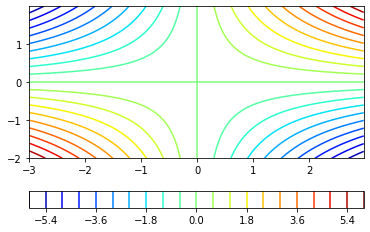

In [2]:
plt.figure()
ax = plt.gca()
cs = plt.contour(xx, yy, zz, 21, cmap=plt.cm.jet) # 21 contours drawn
cb = plt.colorbar(cs, orientation='horizontal')
plt.show()

To specify the levels to draw, you can provide a `levels` argument:

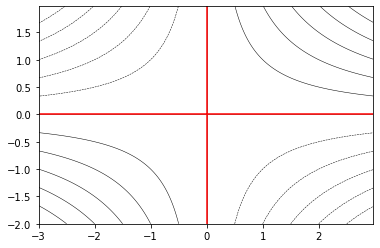

In [17]:
plt.figure()
cs = plt.contour(xx, yy, zz, levels=np.arange(-6, 7, 1),  # specif
                 linewidths=0.5, colors='k') 
plt.contour(xx, yy, zz, levels=0, colors='r') # draw 0 contour
plt.show()

### Adding labels

Adding contour labels can be done by providing a list of labels to draw and a string formatting.

If the `manual` argument is set to `True`, the user can choose where the labels are put.

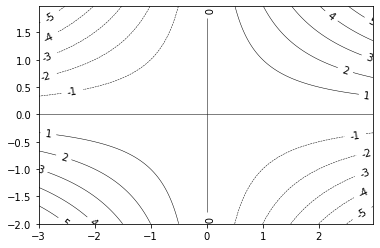

In [18]:
plt.figure()
cs = plt.contour(xx, yy, zz, levels=np.arange(-6, 7, 1),  # specif
                 linewidths=0.5, colors='k') 
plt.clabel(cs, cs.levels, fmt="%.1d", manual=False)
plt.show()

## Filled contours

Fille contours are achieved by using the [contourf](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.contourf.html) function

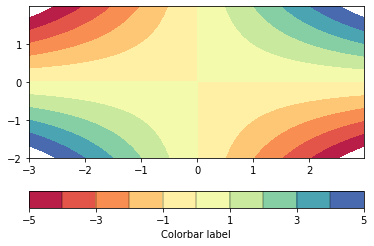

In [19]:
plt.figure()
ax = plt.gca()
cs = plt.contourf(xx, yy, zz,
                  levels = np.arange(-5, 6, 1),
                  cmap=plt.cm.get_cmap('Spectral'), #_r means reverse cmap
                  ) 
cb = plt.colorbar(cs,orientation='horizontal', drawedges=True) # add the colorbar
cb.set_ticks(cs.levels[::2])
cb.set_label('Colorbar label')
plt.show()

By default, data outside the level range are not shown (appear as background). To overcome this, set the
`extend` argument to `'both'`

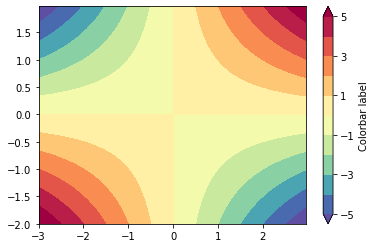

In [6]:
plt.figure()
ax = plt.gca()
cs = plt.contourf(xx, yy, zz,
                  levels=np.arange(-5, 6, 1),
                  cmap=plt.cm.get_cmap('Spectral_r'), #_r means reverse cmap
                  extend='both') # extend means to saturate the colors (instead of masking)
cb = plt.colorbar(cs, orientation='vertical', drawedges=False) # add the colorbar
cb.set_ticks(cs.levels[::2])
cb.set_label('Colorbar label')
plt.show()

To overlay a contour lines over a filled contour, simply call the `contour` function after the `contourf` one. You can recover the plotted levels, use the `levels` attributes.

To add the contour lines on the filled contour colorbar, use the `add_lines` method

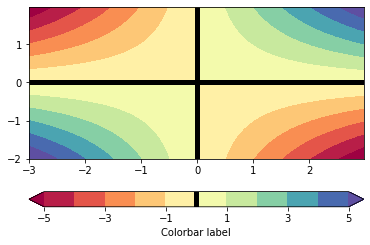

In [7]:
plt.figure()
ax = plt.gca()
cs = plt.contourf(xx, yy, zz,
                  levels = np.arange(-5, 6, 1),
                  cmap=plt.cm.get_cmap('Spectral'),
                  extend='both')
cb = plt.colorbar(cs, orientation='horizontal')
cb.set_ticks(cs.levels[::2])
cb.set_label('Colorbar label')
cl = plt.contour(xx, yy, zz, levels=0, colors='k', linewidths=5)
cb.add_lines(cl)
plt.show()

## Pcolors

Colored mesh are achieved by using the [pcolor](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.pcolor.html) and the [pcolormesh](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.pcolormesh.html) functions.

The second is faster than the former.

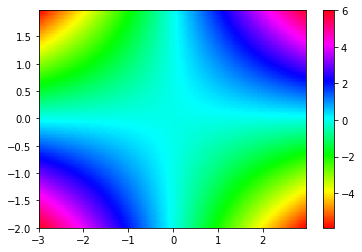

In [8]:
plt.figure()
ax = plt.gca()
cs = plt.pcolor(xx, yy, zz, cmap=plt.cm.get_cmap('hsv'), edgecolors='none')
plt.colorbar(cs)
plt.xlim(np.min(xx), np.max(xx))
plt.ylim(np.min(yy), np.max(yy))
plt.show()

To change the color limits, use the `set_clim` method.

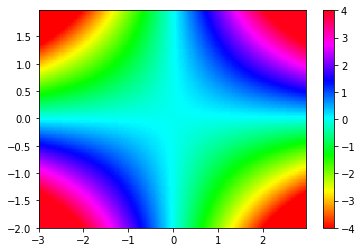

In [9]:
plt.figure()
ax = plt.gca()
cs = plt.pcolormesh(xx, yy, zz, cmap=plt.cm.get_cmap('hsv'))
cs.set_clim(-4, 4)
plt.colorbar(cs)
plt.xlim(np.min(xx), np.max(xx))
plt.ylim(np.min(yy), np.max(yy))
plt.show()

## Imshow

In [21]:
# Preparing some data and functions to show how imshow works
bbox = dict(boxstyle="round,pad=0.3", fc="lightgray", ec="k", lw=1)

def add_text():

    for i in range(0, len(x)):
        for j in range(0, len(y)):
            plt.text(x[i], y[j], data[i, j], ha='center', va='center', bbox=bbox)
            
data = np.arange(0, 15)
data = np.reshape(data, (3, 5))
x = np.arange(3) + 100
y = np.arange(5) + 300

`pcolor` and `pcolormesh` interpolate the data. Therefore, plotting the `(3, 5)` array with them only shows `(2, 4)` pixels.

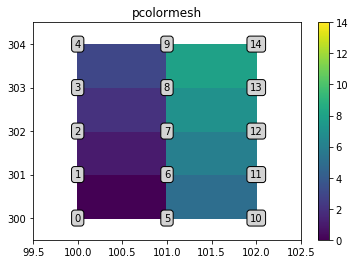

In [23]:
fig = plt.figure()
plt.gca()
cs = plt.pcolormesh(x, y, data.T)
plt.colorbar(cs)
cs.set_clim(data.min(), data.max())
add_text()
plt.xlim(x.min()-0.5, x.max()+0.5)
plt.ylim(y.min()-0.5, y.max()+0.5)
plt.title('pcolormesh')
plt.show()

To display all the data cells without any interpolation, use the [imshow](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.imshow.html) function as follows:s

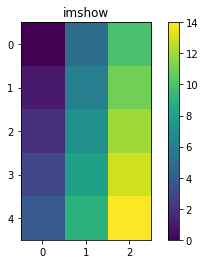

In [25]:
fig = plt.figure()
ax = plt.gca()
plt.title('imshow')
cs = ax.imshow(data.T, interpolation='none') # int = none fails on PDF
plt.colorbar(cs)
plt.show()

By default, the `imshow` function displays the figure with `x` and `y` as pixel indices. Furthermore, one can notice that by default `imshow` function displays the `[0, 0]` corner at the upper left corner.

In order to draw the figure in the right way:
- set the `origin` argument as equal to `lower`, in order to have the `[0, 0]` point at the lower left corner.
- Add the data limits by using the `extent` argument, which should be a 4 element.

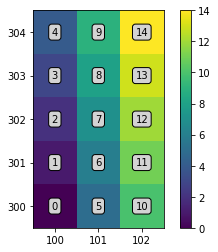

In [27]:
plt.figure()
ax = plt.gca()
extent = [x.min()-0.5, x.max()+0.5, y.min()-0.5, y.max()+0.5]
cs = ax.imshow(data.T, interpolation="none", extent=extent, origin='lower') # int = none fails on PDF
plt.colorbar(cs)
add_text()
plt.show()

## Masked values

By default, masked values are shown in background colors (white by default).

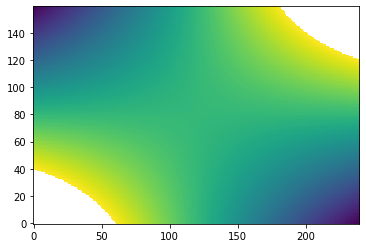

In [28]:
zzm = np.ma.masked_where(np.abs(zz>=3), zz)

plt.figure()
cs = plt.imshow(zzm, origin='lower')
plt.show()

To change the default background color, use the [set_facecolor](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_facecolor.html) method.

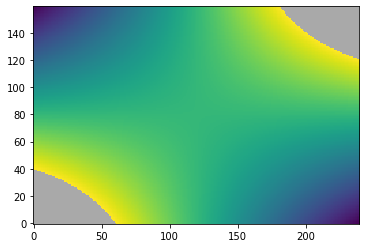

In [29]:
plt.figure()
ax = plt.gca()
ax.set_facecolor('DarkGray')
cs = plt.imshow(zzm, origin='lower')
plt.show()